In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [3]:
# wine data set 불러오기
w_df= pd.read_csv('C:\\Users\\KBH\\Desktop\\IT아카데미 빅데이터\\프로젝트\\winedataset\\winemag_data_130k_v2.csv')

In [4]:
w_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### wine data info

In [5]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### columns detail

country: the country that the wine is from > 와인 제조 국가

description: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc. > 와인 텍스트 리뷰

designation: The vineyard within the winery where the grapes that made the wine are from. > 양조장 안의 포도원?

points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score) > 와인 점수 (1~100)

price: The cost for a bottle of the wine > 와인 가격

province: The province or state that the wine is from > 와인 제조 지역

region_1: The wine growing area in a province or state (ie Napa) > 세부 지역 1 

region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank > 세부 지역 2

taster_name:

variety: The type of grapes used to make the wine (ie Pinot Noir) > 와인 품종

winery: The winery that made the wine > 양조장

title: The title of the wine review, which often contains the vintage if you're interested in extracting that feature

taster_twitter_handle:


### 불필요한 columns 제거

In [6]:
w_df.drop('Unnamed: 0', axis=1, inplace=True)
w_df.drop('taster_twitter_handle', axis=1, inplace=True)
w_df.drop('taster_name', axis=1, inplace=True)

In [7]:
w_df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
# 결측치 확인
pd.DataFrame(w_df.isnull().sum(), columns=['결측치'])

,결측치
country,63
description,0
designation,37465
points,0
price,8996
province,63
region_1,21247
region_2,79460
title,0
variety,1


총 129971개의 데이터 중

country와 province, variety의 결측치 63, 63, 1의 데이터는 무의미한 숫자이므로 결측치 제거.

In [9]:
w_df.dropna(subset=['country', 'province', 'variety'], axis = 0, inplace=True)

In [10]:
w_df = w_df.reset_index()

In [11]:
w_df = w_df.drop(['index'], axis = 'columns')

In [12]:
w_df

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...
129902,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129903,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129904,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129905,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [13]:
pd.DataFrame(w_df.isnull().sum(), columns=['결측치']) # 결측치 제거 확인

,결측치
country,0
description,0
designation,37453
points,0
price,8992
province,0
region_1,21183
region_2,79396
title,0
variety,0


In [14]:
w_df = w_df.fillna({'designation':'unknown', 'region_1':'unknown', 'region_2':'unknown'})
# designation, region_1, region_2의 결측치를 unknown으로 대체

In [15]:
w_df = w_df.fillna({'price':w_df['price'].mean()}) # price의 결측치를 평균으로 대체.

In [16]:
pd.DataFrame(w_df.isnull().sum(), columns=['결측치']) # unknown, mean 으로 대체됨.

,결측치
country,0
description,0
designation,0
points,0
price,0
province,0
region_1,0
region_2,0
title,0
variety,0


In [17]:
w_df

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.368796,Sicily & Sardinia,Etna,unknown,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...
129902,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129903,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Oregon Other,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129904,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,unknown,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129905,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,unknown,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


points 와 price 의 상관관계

In [18]:
wd_price_points = w_df.groupby('points')['price'].mean().reset_index()

In [19]:
# 평균 points 별 가격 확인
wd_price_points

,points,price
0,80,16.467853
1,81,17.497725
2,82,19.437185
3,83,19.019145
4,84,20.258801
5,85,20.966587
6,86,23.032578
7,87,25.623679
8,88,29.153514
9,89,32.420106


In [20]:
#가격과 점수만 추출
w_df_pp = w_df[['price', 'points']]
w_df_pp

,price,points
0,35.368796,87
1,15.000000,87
2,14.000000,87
3,13.000000,87
4,65.000000,87
...,...,...
129902,28.000000,90
129903,75.000000,90
129904,30.000000,90
129905,32.000000,90


In [21]:
# 피어슨 상관계수를 이용한 관계분석
w_df_pp.corr(method='pearson')

,price,points
price,1.000000,0.402179
points,0.402179,1.000000


일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

로 해석하므로

price와 points 사이에는 뚜렷한 양적 선형관계가 있다고 해석할 수 있다.

### 나머지 features 확인

In [22]:
print('country_values\n',w_df['country'].value_counts(),'\n')
print('designation_values\n', w_df['designation'].value_counts(),'\n')
print('province_values\n', w_df['province'].value_counts(),'\n')
print('region_1_values\n', w_df['region_1'].value_counts(),'\n')
print('region_2_values\n', w_df['region_2'].value_counts(),'\n')
print('title_values\n', w_df['title'].value_counts(),'\n')
print('variety_values\n', w_df['variety'].value_counts(),'\n')
print('winery_values\n', w_df['winery'].value_counts(),'\n')

country_values
 US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4471
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                 

In [23]:
pd.DataFrame(w_df['country'].value_counts())

,country
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4471
Argentina,3800
Austria,3345
Australia,2329
Germany,2165


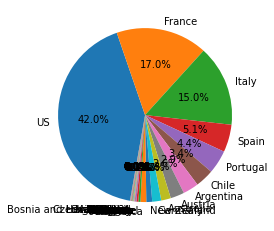

In [24]:
country_dict = dict(w_df['country'].value_counts())
ratio_country = list(country_dict.values())
labels_country = list(country_dict.keys())
plt.pie(ratio_country, labels=labels_country, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

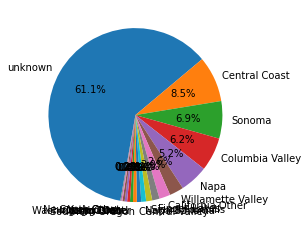

In [25]:
region_2_dict = dict(w_df['region_2'].value_counts())
ratio_region_2 = list(region_2_dict.values())
labels_region_2 = list(region_2_dict.keys())
plt.pie(ratio_region_2, labels=labels_region_2, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()
# 결측치가 너무 많음.

region_2 의 결측값이 너무 많고 다른 정보에 비해 중요성이 떨어지므로 열 삭제.

In [26]:
w_df = w_df.drop(['region_2'], axis = 'columns')

In [27]:
w_df

,country,description,designation,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.368796,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129902,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129903,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129904,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129905,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### categorize country

In [28]:
# n_ame = 북아메리카, eu = 유럽, s_ame = 남아메리카, oce = 오세아니아, afr = 아프리카, bal = 발칸반도, asi = 아시아

def cat_country(x):
    in_worldmap = ''
    if x == 'US':
        in_worldmap = 'n_ame'
    elif x == 'France':
        in_worldmap = 'eu'
    elif x == 'Italy':
        in_worldmap = 'eu'
    elif x == 'Spain':
        in_worldmap = 'eu'
    elif x == 'Portugal':
        in_worldmap = 'eu'
    elif x == 'Chile':
        in_worldmap = 's_ame'
    elif x == 'Argentina':
        in_worldmap = 's_ame'
    elif x == 'Austria':
        in_worldmap = 'eu'
    elif x == 'Australia':
        in_worldmap = 'oce'
    elif x == 'Germany':
        in_worldmap = 'eu'
    elif x == 'New Zealand':
        in_worldmap = 'oce'
    elif x == 'South Africa':
        in_worldmap = 'afr'
    elif x == 'Israel':
        in_worldmap = 'asi'
    elif x == 'Greece':
        in_worldmap = 'bal'
    elif x == 'Canada':
        in_worldmap = 'n_ame'
    elif x == 'Hungary':
        in_worldmap = 'eu'
    elif x == 'Bulgaria':
        in_worldmap = 'bal'
    elif x == 'Romania':
        in_worldmap = 'bal'
    elif x == 'Uruguay':
        in_worldmap = 's_ame'
    elif x == 'Turkey':
        in_worldmap = 'bal'
    elif x == 'Slovenia':
        in_worldmap = 'eu'
    elif x == 'Georgia':
        in_worldmap = 'eu'
    elif x == 'England':
        in_worldmap = 'eu'
    elif x == 'Croatia':
        in_worldmap = 'eu'
    elif x == 'Mexico':
        in_worldmap = 'n_ame'
    elif x == 'Moldova':
        in_worldmap = 'eu'
    elif x == 'Brazil':
        in_worldmap = 's_ame'
    elif x == 'Lebanon':
        in_worldmap = 'asi'
    elif x == 'Morocco':
        in_worldmap = 'afr'
    elif x == 'Peru':
        in_worldmap = 's_ame'
    elif x == 'Ukraine':
        in_worldmap = 'eu'
    elif x == 'Macedonia':
        in_worldmap = 'eu'
    elif x == 'Serbia':
        in_worldmap = 'bal'
    elif x == 'Czech Republic':
        in_worldmap = 'eu'
    elif x == 'Cyprus':
        in_worldmap = 'bal'
    elif x == 'India':
        in_worldmap = 'asi'
    elif x == 'Switzerland':
        in_worldmap = 'eu'
    elif x == 'Luxembourg':
        in_worldmap = 'eu'
    elif x == 'Armenia':
        in_worldmap = 'eu'
    elif x == 'Bosnia and Herzegovina':
        in_worldmap = 'bal'
    elif x == 'Slovakia':
        in_worldmap = 'eu'
    else:
        in_worldmap = 'asi'
    return in_worldmap


In [29]:
w_df['in_worldmap'] = w_df['country'].apply(lambda x: cat_country(x))

In [30]:
w_df.head()

,country,description,designation,points,price,province,region_1,title,variety,winery,in_worldmap
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.368796,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,eu
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,eu
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,n_ame
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,n_ame
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,n_ame


### Price를 y값으로 설정하고 variety, country를 x값으로 설정하여 회귀분석을 하기 위한 preprocessing
### Points를 y값으로 설정하고 variety, country를 x값으로 설정하여 회귀분석을 하기 위한 preprocessing

In [31]:
def drop_others(df):
    df = df.drop(['description'], axis = 'columns')
    df = df.drop(['designation'], axis = 'columns')
    df = df.drop(['province'], axis = 'columns')
    df = df.drop(['region_1'], axis = 'columns')
    df = df.drop(['title'], axis = 'columns')
    df = df.drop(['winery'], axis = 'columns')
    df = df.drop(['in_worldmap'], axis = 'columns')
    return df

In [32]:
w_df_x_y = drop_others(w_df)

In [33]:
w_df_x_y

,country,points,price,variety
0,Italy,87,35.368796,White Blend
1,Portugal,87,15.000000,Portuguese Red
2,US,87,14.000000,Pinot Gris
3,US,87,13.000000,Riesling
4,US,87,65.000000,Pinot Noir
...,...,...,...,...
129902,Germany,90,28.000000,Riesling
129903,US,90,75.000000,Pinot Noir
129904,France,90,30.000000,Gewürztraminer
129905,France,90,32.000000,Pinot Gris


### value_counts()가 너무 적은 country와 variety를 포함하는 columns drop

In [34]:
w_df_x_y = w_df_x_y.groupby('variety').filter(lambda x: len(x) > 1000)
w_df_x_y = w_df_x_y.groupby('country').filter(lambda x: len(x) > 10)
w_df_x_y = w_df_x_y.reset_index()
w_df_x_y = w_df_x_y.drop(['index'], axis=1)

In [35]:
w_df_x_y

,country,points,price,variety
0,Italy,87,35.368796,White Blend
1,Portugal,87,15.000000,Portuguese Red
2,US,87,14.000000,Pinot Gris
3,US,87,13.000000,Riesling
4,US,87,65.000000,Pinot Noir
...,...,...,...,...
103239,Germany,90,28.000000,Riesling
103240,US,90,75.000000,Pinot Noir
103241,France,90,30.000000,Gewürztraminer
103242,France,90,32.000000,Pinot Gris


In [36]:
w_df_x_y.variety.value_counts()

Pinot Noir                    13263
Chardonnay                    11749
Cabernet Sauvignon             9470
Red Blend                      8926
Bordeaux-style Red Blend       6915
Riesling                       5181
Sauvignon Blanc                4959
Syrah                          4142
Rosé                           3562
Merlot                         3100
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2346
Sparkling Blend                2151
Tempranillo                    1809
Rhône-style Red Blend          1470
Pinot Gris                     1452
Champagne Blend                1396
Cabernet Franc                 1352
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [37]:
w_df_x_y.country.value_counts()

US              48153
France          19932
Italy           11370
Portugal         4038
Chile            3630
Spain            3438
Argentina        3204
Austria          2413
Germany          1944
New Zealand      1398
Australia        1291
South Africa      906
Israel            398
Canada            212
Greece            192
Bulgaria          118
Romania           100
England            74
Slovenia           58
Mexico             54
Hungary            50
Moldova            43
Uruguay            40
Turkey             38
Brazil             37
Lebanon            33
Morocco            23
Georgia            17
Croatia            16
Ukraine            12
Peru               12
Name: country, dtype: int64

### variety 와 country 를 인코딩 해줌.

In [38]:
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
        
    def fit_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
        
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list):
        if not isinstance(columns, list):
            columns = [columns]
            
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
            
        return output

In [39]:
mcle = MultiColLabelEncoder()
w_df_x_y_encoded = mcle.fit_transform(w_df_x_y, columns=['country', 'variety'])
w_df_x_y_encoded.head()

,country,points,price,variety
0,15,87,35.368796,26
1,22,87,15.000000,15
2,28,87,14.000000,13
3,28,87,13.000000,19
4,28,87,65.000000,14


### encoding 된 dataframe 을 csv로 저장

In [40]:
w_df_x_y_encoded.to_csv('w_df_x_y_encoded.csv')

In [41]:
w_df_x_y_decoded = mcle.inverse_transform(w_df_x_y_encoded, columns=['country', 'variety'])
w_df_x_y_decoded.head()

,country,points,price,variety
0,Italy,87,35.368796,White Blend
1,Portugal,87,15.000000,Portuguese Red
2,US,87,14.000000,Pinot Gris
3,US,87,13.000000,Riesling
4,US,87,65.000000,Pinot Noir


In [42]:
w_df_x_y_decoded.to_csv('w_df_x_y_decoded.csv')

### two-way anova 분석에서 country 를 region 으로 대체한 csv 파일 생성 및 다운로드

In [44]:
w_df

,country,description,designation,points,price,province,region_1,title,variety,winery,in_worldmap
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.368796,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,eu
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,eu
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,n_ame
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,n_ame
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,n_ame
...,...,...,...,...,...,...,...,...,...,...,...
129902,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),eu
129903,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,n_ame
129904,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,eu
129905,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,eu


In [45]:
def drop_others_2(df):
    df = df.drop(['description'], axis = 'columns')
    df = df.drop(['designation'], axis = 'columns')
    df = df.drop(['province'], axis = 'columns')
    df = df.drop(['region_1'], axis = 'columns')
    df = df.drop(['title'], axis = 'columns')
    df = df.drop(['winery'], axis = 'columns')
    df = df.drop(['country'], axis = 'columns')
    return df

In [46]:
w_df_anova = drop_others_2(w_df)

In [47]:
w_df_anova

,points,price,variety,in_worldmap
0,87,35.368796,White Blend,eu
1,87,15.000000,Portuguese Red,eu
2,87,14.000000,Pinot Gris,n_ame
3,87,13.000000,Riesling,n_ame
4,87,65.000000,Pinot Noir,n_ame
...,...,...,...,...
129902,90,28.000000,Riesling,eu
129903,90,75.000000,Pinot Noir,n_ame
129904,90,30.000000,Gewürztraminer,eu
129905,90,32.000000,Pinot Gris,eu


variety를 다시 encoding 해줌.

In [49]:
mcle = MultiColLabelEncoder()
w_df_anova_encoded = mcle.fit_transform(w_df_anova, columns=['variety'])
w_df_anova_encoded.head()

,points,price,variety,in_worldmap
0,87,35.368796,684,eu
1,87,15.000000,447,eu
2,87,14.000000,433,n_ame
3,87,13.000000,476,n_ame
4,87,65.000000,437,n_ame


In [50]:
w_df_anova_encoded.to_csv('w_df_anova_encoded.csv')

In [53]:
w_df_anova_decoded = mcle.inverse_transform(w_df_anova_encoded, columns=['variety'])

In [55]:
w_df_anova_decoded.head()

,points,price,variety,in_worldmap
0,87,35.368796,White Blend,eu
1,87,15.000000,Portuguese Red,eu
2,87,14.000000,Pinot Gris,n_ame
3,87,13.000000,Riesling,n_ame
4,87,65.000000,Pinot Noir,n_ame


In [56]:
w_df_anova_decoded.to_csv('w_df_anova_decoded.csv')